In [1]:
pip install pillow numpy matplotlib scikit-learn


In [2]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ========= CONFIGURE THIS =========
IMAGE_DIR = "E:/Laparoscopic"   # <--- CHANGE THIS
N_COLORS_PER_IMAGE = 6
MAX_PIXELS_PER_IMAGE = 150_000
RANDOM_STATE = 42
# ==================================


In [3]:
print(os.listdir(IMAGE_DIR))

['Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 0m51s].png', 'Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 0m52s].png', 'Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 0m57s].png', 'Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 1m20s].png', 'Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 1m22s].png', 'Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 1m27s].png']


In [4]:
def load_image_pixels(path, max_pixels=MAX_PIXELS_PER_IMAGE):
    img = Image.open(path).convert("RGB")
    arr = np.array(img)
    pixels = arr.reshape(-1, 3).astype(np.float32)

    if len(pixels) > max_pixels:
        idx = np.random.choice(len(pixels), max_pixels, replace=False)
        pixels = pixels[idx]

    return pixels


def get_dominant_colors(pixels, n_colors=N_COLORS_PER_IMAGE):
    kmeans = KMeans(
        n_clusters=n_colors,
        random_state=RANDOM_STATE,
        n_init="auto"
    )
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_.astype(int)
    counts = np.bincount(labels, minlength=n_colors)

    idx_sorted = np.argsort(-counts)
    return centers[idx_sorted], counts[idx_sorted]


def display_color_bar(colors, counts, title=None):
    total = counts.sum()
    ratios = counts / total

    bar_width = 800
    bar_height = 80
    bar = np.zeros((bar_height, bar_width, 3), dtype=np.uint8)

    start = 0
    for color, ratio in zip(colors, ratios):
        end = start + int(ratio * bar_width)
        bar[:, start:end, :] = color
        start = end
    bar[:, start:, :] = colors[-1]

    plt.figure(figsize=(8, 2))
    plt.imshow(bar)
    plt.title(title)
    plt.axis("off")
    plt.show()


Found 6 PNG images.

=== Image: Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 0m51s].png ===
Dominant colors:
  RGB (146, 89, 72)  -> 23.2%
  RGB (153, 86, 27)  -> 19.2%
  RGB (160, 107, 107)  -> 18.7%
  RGB (125, 70, 48)  -> 18.6%
  RGB (80, 38, 29)  -> 11.7%
  RGB (195, 152, 156)  ->  8.7%


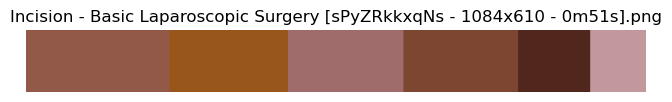


=== Image: Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 0m52s].png ===
Dominant colors:
  RGB (158, 98, 73)  -> 28.5%
  RGB (180, 114, 97)  -> 24.6%
  RGB (141, 79, 54)  -> 23.4%
  RGB (121, 55, 43)  -> 15.0%
  RGB (91, 34, 26)  ->  7.0%
  RGB (37, 21, 29)  ->  1.4%


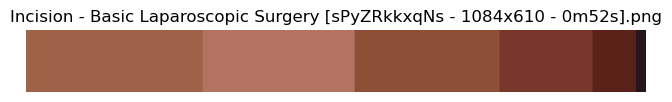


=== Image: Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 0m57s].png ===
Dominant colors:
  RGB (161, 117, 114)  -> 27.3%
  RGB (141, 93, 82)  -> 24.7%
  RGB (140, 79, 47)  -> 23.0%
  RGB (175, 152, 151)  -> 13.5%
  RGB (93, 59, 48)  -> 10.3%
  RGB (231, 222, 223)  ->  1.2%


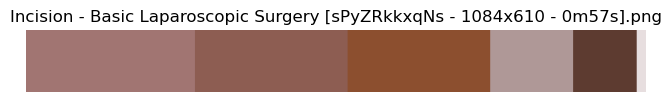


=== Image: Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 1m20s].png ===
Dominant colors:
  RGB (172, 116, 111)  -> 26.2%
  RGB (209, 149, 139)  -> 20.7%
  RGB (130, 88, 83)  -> 20.0%
  RGB (92, 60, 54)  -> 14.1%
  RGB (55, 38, 36)  ->  9.8%
  RGB (245, 207, 196)  ->  9.2%


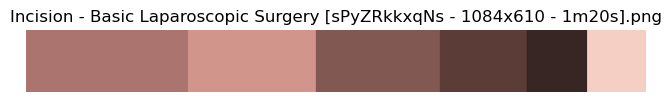


=== Image: Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 1m22s].png ===
Dominant colors:
  RGB (117, 71, 67)  -> 25.2%
  RGB (73, 45, 44)  -> 23.7%
  RGB (172, 103, 88)  -> 17.0%
  RGB (250, 244, 233)  -> 12.2%
  RGB (181, 143, 133)  -> 11.1%
  RGB (231, 195, 177)  -> 10.8%


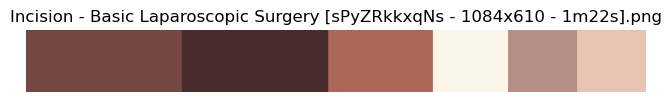


=== Image: Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 1m27s].png ===
Dominant colors:
  RGB (133, 83, 83)  -> 26.9%
  RGB (179, 110, 107)  -> 22.0%
  RGB (103, 60, 60)  -> 19.2%
  RGB (232, 161, 150)  -> 18.7%
  RGB (248, 220, 215)  -> 10.1%
  RGB (1, 3, 6)  ->  3.2%


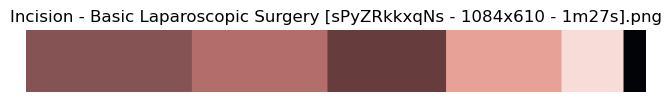

In [5]:
image_paths = sorted(glob.glob(os.path.join(IMAGE_DIR, "*.png")))
print(f"Found {len(image_paths)} PNG images.")

all_pixels = []

for path in image_paths:
    fname = os.path.basename(path)
    print("\n=== Image:", fname, "===")

    pixels = load_image_pixels(path)
    all_pixels.append(pixels)

    colors, counts = get_dominant_colors(pixels)

    # Print RGB + %
    total = counts.sum()
    print("Dominant colors:")
    for c, cnt in zip(colors, counts):
        pct = 100 * cnt / total
        print(f"  RGB {tuple(c)}  -> {pct:4.1f}%")

    # Show color spectrum bar
    display_color_bar(colors, counts, title=fname)



=== Combined Palette (All Images) ===
  RGB (171, 113, 104) -> 27.4%
  RGB (132, 84, 78) -> 21.5%
  RGB (146, 81, 47) -> 15.9%
  RGB (89, 49, 43) -> 14.2%
  RGB (211, 157, 149) -> 13.7%
  RGB (247, 224, 214) ->  7.3%


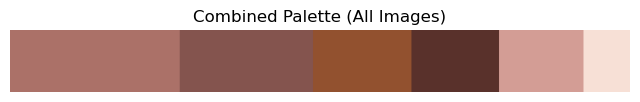

In [4]:
print("\n=== Combined Palette (All Images) ===")

all_pixels_concat = np.vstack(all_pixels)
comb_colors, comb_counts = get_dominant_colors(
    all_pixels_concat,
    n_colors=N_COLORS_PER_IMAGE
)

# Print combined colors
total_comb = comb_counts.sum()
for c, cnt in zip(comb_colors, comb_counts):
    pct = 100 * cnt / total_comb
    print(f"  RGB {tuple(c)} -> {pct:4.1f}%")

# Show combined palette bar
display_color_bar(comb_colors, comb_counts, 
                  title="Combined Palette (All Images)")


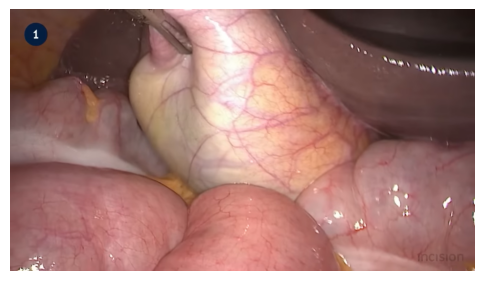

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "E:/Laparoscopic/Incision - Basic Laparoscopic Surgery [sPyZRkkxqNs - 1084x610 - 1m20s].png"  # change filename

img = Image.open(img_path)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()
